## About this assignment

In this assignment you will further deepen your understanding of Preference-based optimization.

## Submission instructions

Please send it by email to loris.roveda@idsia.ch

## Legend
* $l_1$: very-easy
* $l_2$: easy
* $l_3$: normal

# 1. RBF Functions

## 1.1. Creation of an interpolation function $l_1$
Try to create an interpolation function ables to interpolate points. <br>
For example: <br>
x = [$x_1, x_2, .., x_n$], y = [$y_1, y_2, .., y_n$] <br>
f = interpolation function <br>
Note that $ x \in R , y \in R $ <br>
Hint: **scipy** can help you

## Solution

Scipy provides us a nice library called "interpolate" that have some powerful and easy method thath can we use. <br>
See them in [here](https://docs.scipy.org/doc/scipy/reference/interpolate.html)

In [39]:
from scipy.interpolate import Rbf, RBFInterpolator, interp1d
import numpy as np
import seaborn as sns
import pandas as pd

def get_dataset(n_sample):
  # Dataset with x_1, x_2 sampled from uniform distribution
  rng = np.random.RandomState(0)

  x = np.linspace(-3,3, n_sample,endpoint=True)
  # y = (6*x-2)**2 *np.sin(12*x-4)
  y = (1+ (x*np.sin(2*x)*np.cos(3*x))/(1+x**2))**2 + x**2/12 + x/10 

  return x,y

def get_ground_trowth(n_sample):
  # Ground trowth with linspace sample

  x = np.linspace(-3,3,n_sample,True)
  # y = (6*x-2)**2 *np.sin(12*x-4)
  y = (1+ (x*np.sin(2*x)*np.cos(3*x))/(1+x**2))**2 + x**2/12 + x/10 
  
  
  return x,y 

def simulation(x):
  return (1+ (x*np.sin(2*x)*np.cos(3*x))/(1+x**2))**2 + x**2/12 + x/10
  
x_sampled, y_sampled = get_dataset(20)
interp_func_rbf = Rbf(x_sampled, y_sampled)
interp_func_base = interp1d(x_sampled, y_sampled)

x, y= get_ground_trowth(1000)

y_hat_base = interp_func_base(x)
y_hat_rbf = interp_func_rbf(x)


## 1.2 Plot the function  $l_1$
Try to plot the interpolation function

## Solution

,Residuals
Base Interpolation,3.332444
RBF Interpolation,0.542178


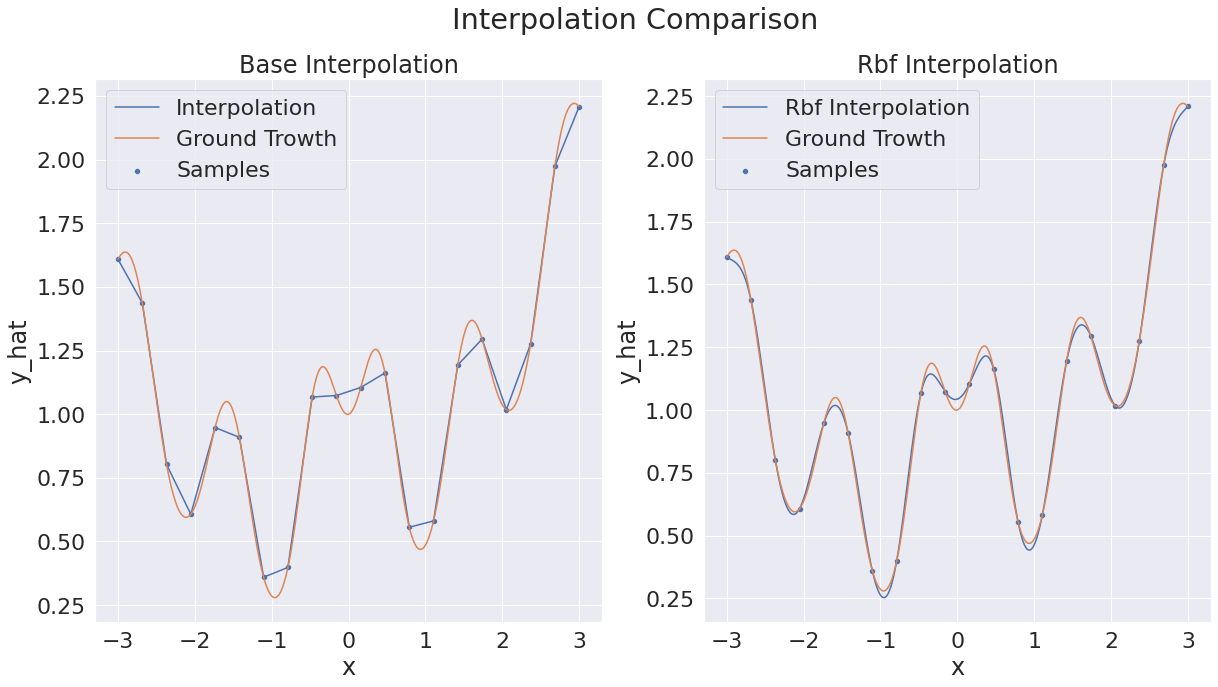

In [40]:
from matplotlib import pyplot as plt

dataset = {"x_sampled": x_sampled, "y_sampled": y_sampled}
test_interpolation = { "x": x, "y_hat":y_hat_base, "y_true":y}
test_rbf =  { "x": x, "y_hat":y_hat_rbf, "y_true":y}
# dataset = pd.DataFrame(dataset)
# test = pd.DataFrame(test)
sns.set_theme(font_scale=2,rc={'figure.figsize':(20, 10)})

# Plot base interpolation (classical one) on left, and rbf on right
fig, axes = plt.subplots(1, 2)
fig.suptitle('Interpolation Comparison')
axes[0].set_title('Base Interpolation')

sns.lineplot(data = test_interpolation, x="x", y="y_hat", label="Interpolation", ax=axes[0])
sns.scatterplot(data = dataset, x="x_sampled", y="y_sampled", label="Samples", ax=axes[0])
sns.lineplot(data = test_interpolation, x="x", y="y_true", label="Ground Trowth", ax=axes[0])

axes[1].set_title('Rbf Interpolation')
sns.lineplot(data = test_rbf, x="x", y="y_hat", label="Rbf Interpolation", ax=axes[1])
sns.scatterplot(data = dataset, x="x_sampled", y="y_sampled", label="Samples", ax=axes[1])
sns.lineplot(data = test_interpolation, x="x", y="y_true", label="Ground Trowth", ax=axes[1])

residuals_base = np.sum((y_hat_base - y)**2)
residuals_rbf = np.sum((y_hat_rbf - y)**2)
data = {
  "Residuals": {"Base Interpolation": residuals_base, "RBF Interpolation":residuals_rbf},
}
df = pd.DataFrame(data)

df.head()


## 1.3  Creation of an RBF interpolation function $l_1$

> Blocco con rientro


Same as 1.1 but using RBF function. Test different rbf.

### To recap, a list of RBF function
* multiquadric : $sqrt((r/epsilon)^2 + 1)$
* inverse : $1.0/sqrt((r/epsilon)^2 + 1)$
* gaussian : $exp(-(r/epsilon)^2)$
* linear : $r$
* cubic: $r^3$
* quintic: $r^5$
* thin_plate: $r^2 * log(r)$

## Solution

              Residuals
cubic          0.000003
gaussian       0.196967
inverse        0.014105
linear         0.005177
multiquadric   0.000118
The best RBF function is quintic


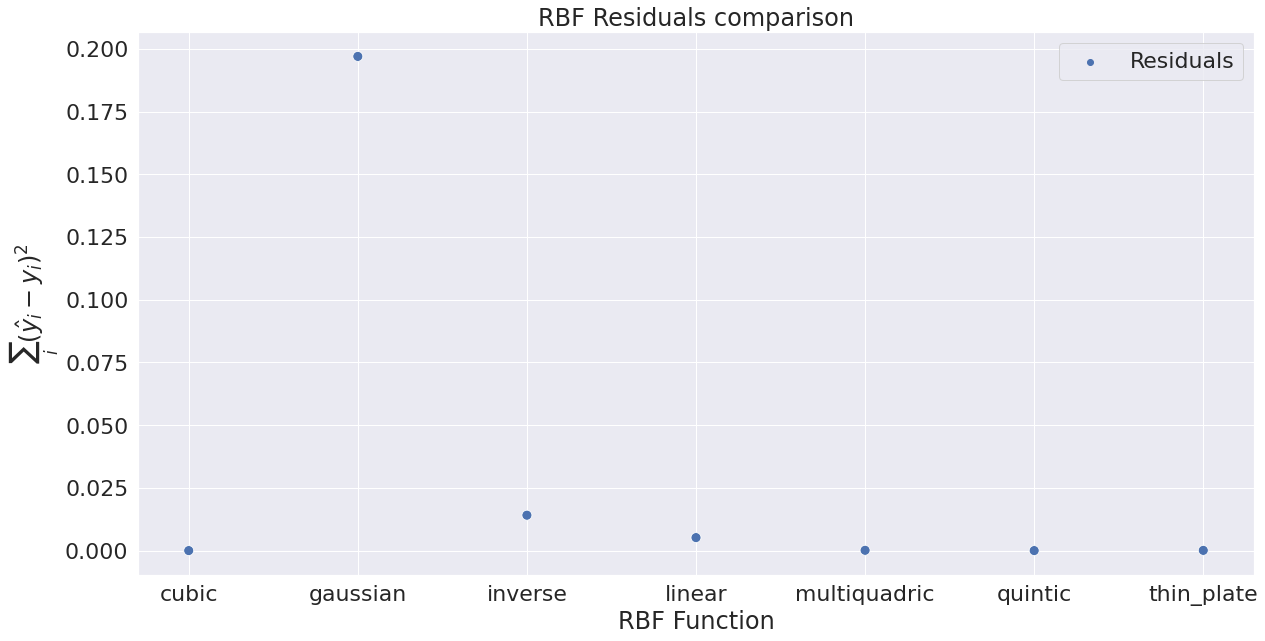

<Figure size 1440x720 with 0 Axes>

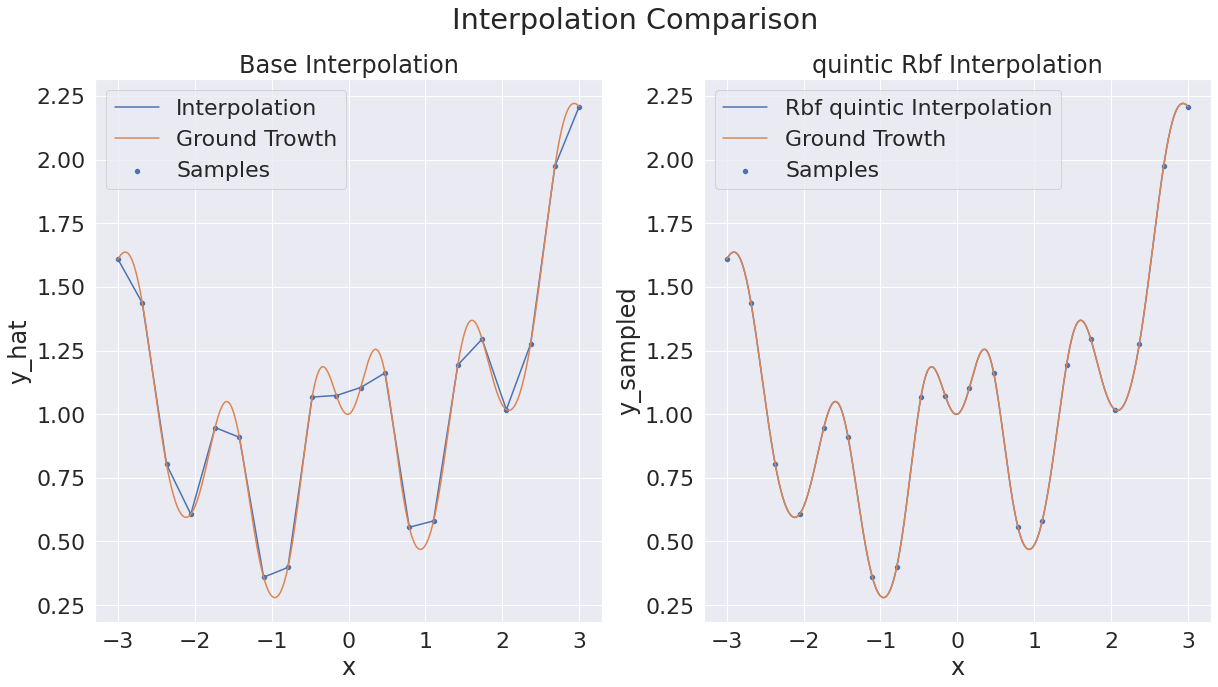

In [41]:
x_sampled, y_sampled = get_dataset(100)

def get_estimation(interpolator, x):
  y_hat = interpolator(x)
  return y_hat

interp_func_rbf = Rbf(x_sampled, y_sampled)
interp_func_base = interp1d(x_sampled, y_sampled)

interpolators = []
interpolators_name = ["multiquadric", "inverse", "gaussian", "linear", "cubic", "quintic", "thin_plate"]

for interpolator_name in interpolators_name:
  interpolators.append(Rbf(x_sampled, y_sampled,function =interpolator_name))

def chart():
  fig, axes = plt.subplots(1, 2)
  fig.suptitle('Interpolation Comparison')
  axes[0].set_title('Base Interpolation')

  sns.lineplot(data = test_interpolation, x="x", y="y_hat", label="Interpolation", ax=axes[0])
  sns.scatterplot(data = dataset, x="x_sampled", y="y_sampled", label="Samples", ax=axes[0])
  sns.lineplot(data = test_interpolation, x="x", y="y_true", label="Ground Trowth", ax=axes[0])
  axes[1].set_title('Rbf Interpolation')
  sns.lineplot(data = test_rbf, x="x", y="y_hat", label="Rbf Interpolation", ax=axes[1])
  sns.scatterplot(data = dataset, x="x_sampled", y="y_sampled", label="Samples", ax=axes[1])
  sns.lineplot(data = test_interpolation, x="x", y="y_true", label="Ground Trowth", ax=axes[1])

x, y= get_ground_trowth(1000)
residuals = {"Residuals" : {}}

for id, interpolator in enumerate(interpolators):
  y_hat = get_estimation(interpolator,x)
  residuals["Residuals"][interpolators_name[id]] = np.sum((y_hat - y)**2)

  

df = pd.DataFrame(residuals)

print(df.head())

sns.scatterplot(data = df,  markers=True, s=100)
plt.title('RBF Residuals comparison')
plt.xlabel('RBF Function')
plt.ylabel('$\sum_i{(\hat{y}_i-y_i)^2}$')

# y_hat_rbf = interp_func_rbf(x)
best_rbf = np.argmin(list(residuals["Residuals"].values()))
print(f"The best RBF function is {interpolators_name[best_rbf]}")
y_hat = get_estimation(interpolators[best_rbf],x)

fig = plt.figure()
fig, axes = plt.subplots(1, 2)
fig.suptitle('Interpolation Comparison')
axes[0].set_title('Base Interpolation')

sns.lineplot(data = test_interpolation, x="x", y="y_hat", label="Interpolation", ax=axes[0])
sns.scatterplot(data = dataset, x="x_sampled", y="y_sampled", label="Samples", ax=axes[0])
sns.lineplot(data = test_interpolation, x="x", y="y_true", label="Ground Trowth", ax=axes[0])
axes[1].set_title(f'{interpolators_name[best_rbf]} Rbf Interpolation')
sns.lineplot(data = test_rbf, x="x", y=y_hat, label=f"Rbf {interpolators_name[best_rbf]} Interpolation", ax=axes[1])
sns.scatterplot(data = dataset, x="x_sampled", y="y_sampled", label="Samples", ax=axes[1])
sns.lineplot(data = test_interpolation, x="x", y="y_true", label="Ground Trowth", ax=axes[1])
# x, y= get_ground_trowth(1000)
# residuals = {"Residuals" : {}}
# plt.figure()
# sns.lineplot(data = test_interpolation, x="x", y="y_hat", label="Interpolation")
# sns.scatterplot(data = dataset, x="x_sampled", y="y_sampled", label="Samples")
# sns.lineplot(data = test_interpolation, x="x", y="y_true", label="Ground Trowth")

# for id, interpolator in enumerate(interpolators):
#   y_hat = get_estimation(interpolator,x)
#   residuals["Residuals"][interpolators_name[id]] = np.sum((y_hat - y)**2)
#   test_rbf =  { "x": x, "y_hat":y_hat, "y_true":y}

#   sns.lineplot(data = test_rbf, x="x", y="y_hat", label=f"Rbf {interpolators_name[id]} Interpolation")
# plt.show()


# df = pd.DataFrame(residuals)


## 1.4. Question A $l_1$
* Which is the best RBF function? Try to answer (max 2 lines)


The figure above compares residual sum of squares (RSS) of the interpolations obtained with the different RBF functions . It can be seen from the chart that the best RBF function for the interpolation of the $(x_i,y_i)$ samples was found to be the thin plate. T
his result was obtained by going to compare the sum of the squares of the residuals of the different interpolation methods tested. In particular, in absolute terms thin plate turns out to produce a better fit, but with similar performance to cubic and linear RBF.




## 1.5. Question B $l_2$
* Do you think there are techniques to establish the best rbf function to use? If so, which one? (max 5 lines)

In [ ]:
#Already in section 1.3 iterating over the various kernels I determine the best one based on the Residuals

In order to establish the best RBF function can be compared different quantitative indices (related to the quality of interpolation) of the different rbf function.
In particular, one can compare:

*   RSS, as done in the previous point, that is, comparing the residual sum of squares, defined as: $\sum_i{(\hat{y}_i-y_i)^2}$ 

*   MSE, that is, the Mean Square Error: $\frac{1}{N}\sum_i{(\hat{y}_i-y_i)^2}$

*   NMSE, that is, the Normalize Mean Square Error: $\frac{1}{N}\sum_i{(\hat{y}_i-y_i)^2} \frac{1}{\mathbf{E}[y]}$
*    RMSE, which is the Root Mean Squared Error: $\sqrt{MSE}$

An important point is to calculate these indices with a testing dataset $D=[(x_1.y_1), \cdots, (x_n.y_n)]$ different from the training set, so as to evaluate the robustness of the interpolation. In this way, it can be verified whether the method adopted is capable of generalization with respect to the dataset used for training.
A method suggested by Albert Bemporad and Dartio Piga (in Global Optimization Based on active preference learning with radial basis functions) is to use K-fold cross validation of Stone (1974) for hyper parameter tuning of $\epsilon$ in RBF.



## 1.6. Create an explorative function $l_2$
Create an explorative function that receives as input an array of point and returns 0 if the point has already been tested, while the further you move away from the tested points, the higher the value of the function will be.

Example
tested_points=[2,3,4,7,9] <br>
d = np.linspace(0,10,1000) <br>
y_idw = idw_function(tested_points,d)<br>
plot(d,y_idw)<br>

![alt text](idw.png)

## Solution

[Text(0, 0.5, 'IDW'), Text(0.5, 0, 'x domain')]

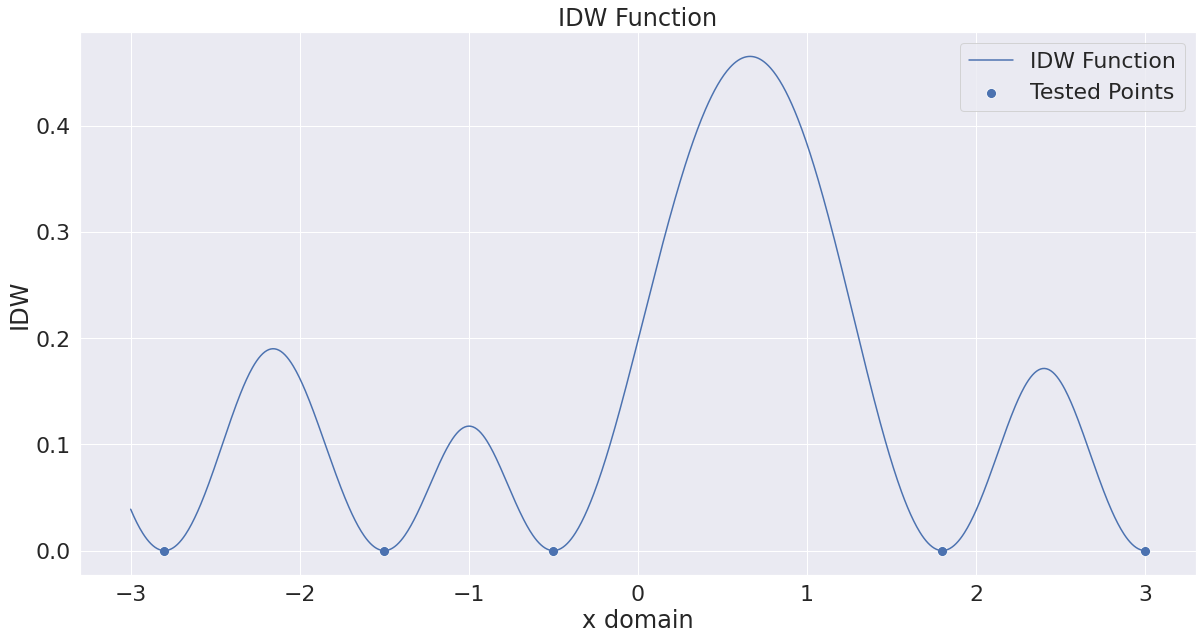

In [42]:
def idw_function(tested_points,x):
  if isinstance(tested_points,list):
    tested_points= np.array(tested_points)
  if x in tested_points:
    return 0
  else:
    return np.arctan(1/np.sum(1.0/((x-tested_points)**2))) #tan-1(sum_i (1/wi) ) where w_i = 1/(d^2(x,x_i))


    
tested_points = [-2.8,-1.5,-0.5,1.8,3]  # Similar to Alberto Bemporad  Dario Piga Paper
d = np.linspace(-3,3,1000)

y_idw = np.array([idw_function(tested_points,x) for x in d])
ax = sns.lineplot(x=d, y=y_idw, label="IDW Function")
sns.scatterplot(x=tested_points, y=0, label="Tested Points",markers=True, s=100).set(title='IDW Function')
ax.set(xlabel='x domain', ylabel='IDW')


## 1.7 Create an acquisition function $l_1$
To recap, the acquition function $a$ is the combination of the surrogate function and the explorative function. In other words: <br>
$a =\hat{f}(x) + \delta idw(x)$ <br>

Where:
* $\hat{f}(x)$: is the interpolated function
* $\delta$: is the explorative parameter
* $idw(x)$: is the explotation function

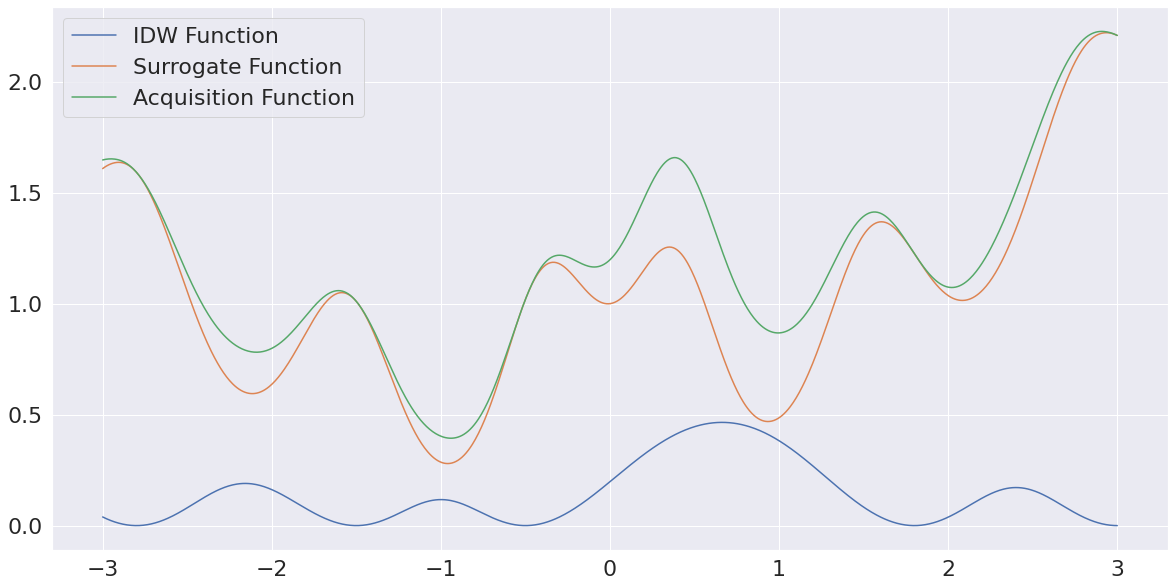

<Figure size 1440x720 with 0 Axes>

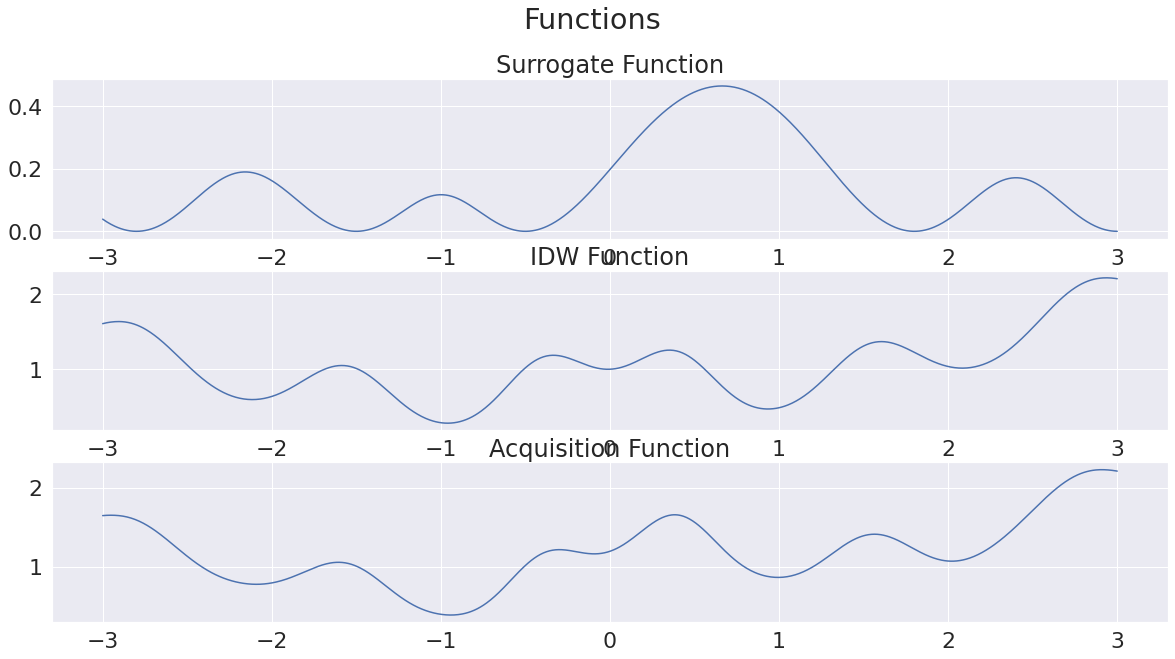

In [43]:
def surrogate_fcn(x): # just a re-name
  return get_estimation(interpolators[best_rbf],x)

def acquisition_function(x,tested_points, delta):
  return surrogate_fcn(x) + delta * idw_function(tested_points,x)

tested_points = [-2.8,-1.5,-0.5,1.8,3]  # Similar to Alberto Bemporad  Dario Piga Paper
d = np.linspace(-3,3,1000)

y_acquisition = np.array([acquisition_function(x,tested_points, 1) for x in d])
# ax = sns.lineplot(x=d, y=y_acquisition, label="Acquisition Function")

# sns.scatterplot(x=tested_points, y=0, label="Tested Points",markers=True, s=100).set(title='IDW Function')
# ax.set(xlabel='x domain', ylabel='IDW')

y_idw = np.array([idw_function(tested_points,x) for x in d])
y_surrogate = surrogate_fcn(d)

sns.lineplot(x=d, y = y_idw, label="IDW Function")
sns.lineplot(x=d, y = y_surrogate, label ="Surrogate Function")
sns.lineplot(x=d, y = y_acquisition, label ="Acquisition Function")
y_hat = get_estimation(interpolators[best_rbf],x)

fig = plt.figure()
fig, axes = plt.subplots(3, 1)
fig.suptitle('Functions')
axes[0].set_title('Surrogate Function')
axes[1].set_title('IDW Function')
axes[2].set_title('Acquisition Function')
sns.lineplot(x=d, y = y_idw, ax = axes[0]) 
sns.lineplot(x=d, y = y_surrogate, ax = axes[1])
sns.lineplot(x=d, y = y_acquisition, ax = axes[2])


## 1.8 Find the next value to be tested from the acquisition function $l_1$
To recap, the next point to be tested is calculated by minimizing or maximizing (dependes on the problem) the acquisition function.

## Solution

Iteration: 1, x_next: [-2.18151123]
Iteration: 2, x_next: [-1.39461832]
Iteration: 3, x_next: [-0.95486318]
Iteration: 4, x_next: [-0.94200993]
Iteration: 5, x_next: [-0.95947505]
Iteration: 6, x_next: [-0.95973556]
Iteration: 7, x_next: [-0.95976825]
Iteration: 8, x_next: [-0.95976715]


/usr/local/lib/python3.8/dist-packages/scipy/interpolate/rbf.py:266: LinAlgWarning: Ill-conditioned matrix (rcond=1.93701e-19): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


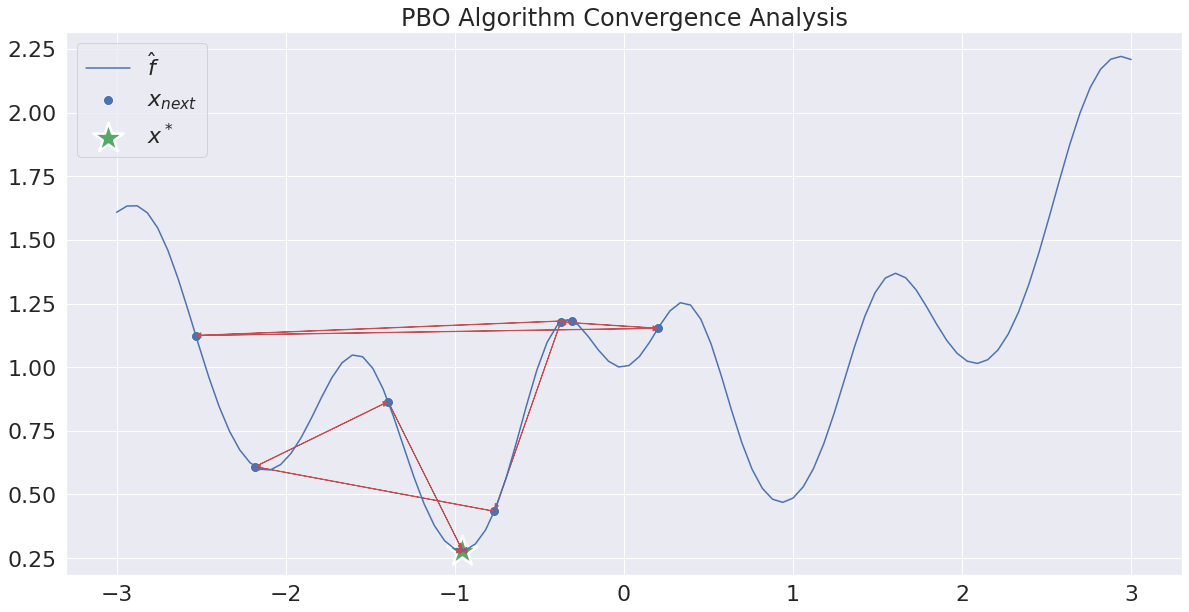

In [44]:
from scipy.optimize import minimize

def simulation(x):
  return (1+ (x*np.sin(2*x)*np.cos(3*x))/(1+x**2))**2 + x**2/12.0 + x/10.0
def surrogate_fcn(x,interpolator): # just a re-name
  return get_estimation(interpolator,x)

def acquisition_function(x,tested_points, interpolator, delta):
  return surrogate_fcn(x,interpolator) + delta * idw_function(tested_points,x)

delta = 1
n_max = 15
n_init = 5

x0 = np.random.uniform(-3, 3, n_init)
tested_points = None

x=x0[np.random.randint(n_init)]       # Da capire: prima era = x0 però x era un vettore invece no!
n = 1 
# interpolator = Rbf(x0, simulation(x0), function=interpolators_name[best_rbf])
tested_points = x0

toll = 1e-5 # I've added a toll on delta x_next and previus x because adding a lot of similar row to rbf it becomes not well conditioned
delta =  100
while n < n_max and delta > toll:
  # Update surrogate function: 
  interpolator = Rbf(tested_points, simulation(tested_points), function=interpolators_name[best_rbf])     #Da investigare: pensavo x, in realtà sono x accumulati = tested_points

  # Just for a x seed in minimization
  x_for_seed = np.random.uniform(-3, 3, 100)
  y_for_seed = np.array([acquisition_function(x_test,tested_points, interpolator, delta) for x_test in x_for_seed])
  x_seed = x_for_seed[np.argmin(y_for_seed)]

  # Update acquisition function and minimize
  result = minimize(lambda x: acquisition_function(x, tested_points, interpolator, delta), x0 = x_seed, bounds = [(-3,3)])
  delta = np.abs(result.x-x_next)

  #Update x_next
  x_next= result.x
  print(f"Iteration: {n}, x_next: {x_next}")
  x=x_next

  #Apend tested points
  tested_points = np.append(tested_points, x_next, axis=0)
  n += 1

tested_points
y_tested_points = simulation(tested_points)

sns.scatterplot(tested_points,y_tested_points, label="$x_{next}$", s=100).set(title='PBO Algorithm Convergence Analysis')


sns.scatterplot([tested_points[-1]],[y_tested_points[-1]], label="$x^*$", s=1000, marker="*",color ="g")

domain = np.linspace(-3,3,100,endpoint=True)
sns.lineplot(x=domain , y = simulation(domain), label="$\hat{f}$")
# ax = sns.lineplot(tested_points,y_tested_points, label="$x_{next}$", size =100, markers=True,sort = False)


x_dx = tested_points[1:]-tested_points[:-1]
y_dy = y_tested_points[1:]-y_tested_points[:-1]

for id,(dx,dy) in enumerate(zip(x_dx,y_dy)): 

  ax = plt.arrow(tested_points[id], y_tested_points[id], dx, dy ,width = 0.001,head_width=0.02 , length_includes_head = True, color="r")
